In [1]:
%matplotlib inline

import numpy as np
from pprint import pprint

from PIL import Image
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import grad
import torchvision
from torchvision import models, datasets, transforms
import torch.nn.functional as func
#torch.manual_seed(50)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print(torch.__version__, torchvision.__version__)

1.9.0+cu111 0.10.0+cu111


In [2]:
# dst = datasets.CIFAR100("~/.torch", download=True)
# dst = datasets.MNIST("~/.torch", download=True)

tp = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor()
])
tt = transforms.ToPILImage()

device = "cpu"
# if torch.cuda.is_available():
#     device = "cuda"
print("Running on %s" % device)

def label_to_onehot(target, num_classes=10):
    target = torch.unsqueeze(target, 1)
    onehot_target = torch.zeros(target.size(0), num_classes, device=target.device)
    onehot_target.scatter_(1, target, 1)
    return onehot_target

def cross_entropy_for_onehot(pred, target):
    return torch.mean(torch.sum(- target * F.log_softmax(pred, dim=-1), 1))

Running on cpu


In [6]:
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.5, 0.5)
#         nn.init.xavier_uniform_(m.weight.data)
#     if hasattr(m, "bias"):
#         #m.bias.data.uniform_(-0.5, 0.5)
#         #nn.init.xavier_uniform(m.bias.data)
#         m.bias.data.fill_(0)



# class LeNet(nn.Module):

#     def __init__(self):

#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, kernel_size=5,stride=2)
#         self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=2)
#         self.fc1 = nn.Linear(16*5*5, 256)
#         self.fc2 = nn.Linear(256, 120)
#         self.fc3 = nn.Linear(120, 106)

#     def forward(self, x):
#         #x = func.relu(self.conv1(x))
#         x = func.sigmoid(self.conv1(x))
#         #x = func.max_pool2d(x, 2)
#         #x = func.relu(self.conv2(x))
#         x = func.sigmoid(self.conv2(x))
#         #x = func.max_pool2d(x, 2)
#         x = x.view(x.size(0), -1)
#         #x = func.relu(self.fc1(x))
#         x = func.sigmoid(self.fc1(x))
#         #x = func.relu(self.fc2(x))
#         x = func.sigmoid(self.fc2(x))
#         x = self.fc3(x)
#         return x

    
    
# def weights_init(m):
#     if hasattr(m, "weight"):
#         m.weight.data.uniform_(-0.3, 0.3)
#     if hasattr(m, "bias"):
#         m.bias.data.uniform_(-0.3, 0.3)


def weights_init(m):
    if hasattr(m, "weight"):
        m.weight.data.uniform_(-0.5, 0.5)
    if hasattr(m, "bias"):
        m.bias.data.uniform_(-0.5, 0.5)


class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        act = nn.Sigmoid
        self.body = nn.Sequential(
            nn.Conv2d(3, 12, kernel_size=5, padding=5//2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=2),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
            act(),
            nn.Conv2d(12, 12, kernel_size=5, padding=5//2, stride=1),
            act(),
        )
        self.fc = nn.Sequential(
            nn.Linear(768, 106)
        )
        
    def forward(self, x):
        out = self.body(x)
        out = out.view(out.size(0), -1)
        # print(out.size())
        out = self.fc(out)
        return out


net = LeNet().to(device)
net.apply(weights_init)

criterion = cross_entropy_for_onehot

In [4]:
cifar10 = fetch_mldata("cifar_10")

NameError: ignored

In [ ]:
print(cifar10)

In [ ]:
# dst = datasets.CIFAR100("~/.torch", download=True)

import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.datasets import fetch_openml as fetch_mldata
# cifar10 = fetch_mldata("cifar_10_small")

# print(len(dst))
# print(len(dst[1][0]))

# lfw_people=fetch_olivetti_faces(resize=0.25)
# # x=dst.images
# # y=dst.target
# lfw_people=cifar10
# x=lfw_people.data
# y=lfw_people.target
# target_names=lfw_people.target_names
# n_classes=target_names.shape[0]
# dst = torch.tensor(dst)
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# X_train, X_test, y_train, y_test = train_test_split(dst[0], dst[1], test_size=0.25,shuffle=False)


lfw_people=fetch_lfw_people(min_faces_per_person=14,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)
x=lfw_people.images
y=lfw_people.target

target_names=lfw_people.target_names
n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,shuffle=False)


# print(trainX.shape)

# #two people
# X_train_two = []
# y_train_two = []
# X_test_two = []
# y_test_two = []
# for ct_d in range(X_train.shape[0]):
#     if  y_train[ct_d] == 6:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_train_two.append(X_train[ct_d])
#         y_train_two.append(1)
        
# for ct_d in range(X_test.shape[0]):
#     if  y_train[ct_d] == 6:        
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(0)
#     if  y_train[ct_d] == 9:
#         X_test_two.append(X_test[ct_d])
#         y_test_two.append(1)
        
# X_train = np.asarray(X_train_two)    
# X_test = np.asarray(X_test_two)  
# y_train = np.asarray(y_train_two)  
# y_test = np.asarray(y_test_two)  

# print (len(X_train[0]))
# print (len(X_test))
         
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
#X_train = torch.transpose
#X_train = X_train.astype('float32')
# X_train /= 255.0
# X_test /= 255.0

 


x_train = torch.FloatTensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = [int(x) for x in y_train]
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = [int(x) for x in y_test]
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)
testing = data.TensorDataset(x_test,y_test)

dst_tensor=training
plt.imshow(tt(dst_tensor[i][0].cpu()))
criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=64, shuffle=True)

iter_ = 0
for epoch in range(0):

    for i,data in enumerate(trainloader,0):
   
        #if epoch>=1:
        if i>=2:
            break
        iter_=iter_+1
        #print (iter_)
        inputs,label = data
        
        inputs,label =  Variable(inputs),Variable(label) 
      
        optimizer_train.zero_grad()
        
    
        outputs_benign=net(inputs)
        #outputs_benign = F.softmax(outputs_benign, dim=-1)
        #print (outputs_benign[0])
     
        loss_benign =  criterion_train(outputs_benign,label)
       
        #print("loss computed")
        loss_benign.backward()
        #print("loss BP")
        optimizer_train.step()
        
        #if i%2000==0:
        print (loss_benign.item())
        #torch.save(net.state_dict(),'./LFW_net.pth')  
       
  
print ('fininshed training')
total = len(y_test)
acc =0.0
for ct in range(total):
    testing_data = tt(testing[ct][0].cpu())
    testing_data1 = tp(testing_data).to(device)
    testing_data2 = testing_data1.view(1, *testing_data1.size())
    y_pred = net(testing_data2)
    predicted = torch.argmax(y_pred)
  
    if predicted == y_test[ct]:
        acc=acc+1
accuracy = acc / total
print (accuracy)
print ('fininshed testing')

In [ ]:
# Find the corresponging Image in this shuffling to compare with CPL

# ######### honest partipant #########
# for img_index in range(100):
#   dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

#   gt_data = tp(dst_pil).to(device)
#   gt_data = torch.unsqueeze(gt_data,0)

#   batch = 1  #
#   for bat in range(batch-1):
#       dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
#       tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
#       print(tmp.shape)
#       gt_data = torch.cat((gt_data,tmp),0)


#   print (gt_data.shape)
#   #gt_data = gt_data.view(1, *gt_data.size())
#   #gt_label = torch.Tensor([dst_pil[img_index][1]]).long().to(device)  #use img_index
#   gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
#   gt_label = gt_label.view(1, )
#   gt_onehot_label = label_to_onehot(gt_label, num_classes=106)



#   plt.imshow(dst_pil)
#   #plt.savefig("./attack_image/original")
#   print(f"value of the index here is : { img_index }")
#   plt.title("Ground truth image")
#   print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())
#   plt.show()
#   # compute original gradient 
#   out = net(gt_data)
#   y = criterion(out, gt_onehot_label)
#   dy_dx = torch.autograd.grad(y, net.parameters())


#   # share the gradients with other clients
#   original_dy_dx = list((_.detach().clone() for _ in dy_dx))

In [ ]:


######### honest partipant #########
# img_index = 13   #use img_index
# dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

# gt_data = tp(dst_pil).to(device)
# gt_data = torch.unsqueeze(gt_data,0)

# batch = 5  #
# for bat in range(batch-1):
#     dst_pil = tt(dst_tensor[img_index+1+bat][0].cpu())   #use img_index
#     tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
#     print(tmp.shape)
#     gt_data = torch.cat((gt_data,tmp),0)


# print (gt_data.shape)
# #gt_data = gt_data.view(1, *gt_data.size())
# #gt_label = torch.Tensor([dst_pil[img_index][1]]).long().to(device)  #use img_index
# gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
# gt_label = gt_label.view(1, )
# gt_onehot_label = label_to_onehot(gt_label, num_classes=106)


######### honest participant #########
img_index = 8   #use img_index
dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

gt_data = tp(dst_pil).to(device)
gt_data = torch.unsqueeze(gt_data,0)

gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
gt_label = gt_label.view(1, )
gt_onehot_label = label_to_onehot(gt_label, num_classes=106)

# for i in range(0,100):
#   plt.imshow(tt(dst_tensor[i][0].cpu()))
#   plt.show()
# plt.show()
# plt.axis('off')
# plt.savefig("./lfw_batch_idx_12")

print(gt_label)

batch = 1
#idx_m = [20,25,32,33,48,79,84]
#idx_m = [2]
idx_m = []
match = 1
for s in range(1000):
    if dst_tensor[s][1]==8:
        if match==1:
            match = match + 1
        else:    
            idx_m.append(s)
        
        # dst_pil = tt(dst_tensor[s][0].cpu())
        # plt.imshow(dst_pil)
        # plt.axis('off')
        #plt.savefig("./original/lfw_batch_idx_%s"%(len(idx_m)))
        
        
        if len(idx_m)==batch:
            break
print("idx is below")
print (idx_m)
            
for bat in range(batch-1):
            dst_pil = tt(dst_tensor[idx_m[bat+1]][0].cpu())   #use img_index
            tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
            #print(tmp.shape)
            gt_data = torch.cat((gt_data,tmp),0)

            gt_label_tmp = dst_tensor[idx_m[bat+1]][1].long().to(device) #use img_index
            gt_label_tmp = gt_label_tmp.view(1, )
            gt_label = torch.cat((gt_label,gt_label_tmp),0)
            gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=106)),0)

gt_label = torch.reshape(gt_label,(-1,1))    
print (gt_data.shape)
print (gt_label.shape)
print (gt_onehot_label.shape)
print (gt_label)



plt.imshow(dst_pil)
plt.axis('off')
#plt.savefig("./attack_image/original")

plt.title("Ground truth image")
# print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())

# compute original gradient 
out = net(gt_data)
y = criterion(out, gt_onehot_label)
dy_dx = torch.autograd.grad(y, net.parameters())


# share the gradients with other clients
original_dy_dx = list((_.detach().clone() for _ in dy_dx))

In [ ]:
2# generate dummy data and label
torch.manual_seed(1890)

usePatterned = True
print(gt_data.size())
aaa = torch.rand([3,8,8])
bbb = torch.cat((aaa,aaa),dim=1)
ccc = torch.cat((bbb,bbb),dim=1)
ddd = torch.cat((ccc,ccc),dim=2)
eee = torch.cat((ddd,ddd),dim=2)
dummy_data5 = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
dummy_label = torch.randn(gt_onehot_label.size()).to(device).requires_grad_(True)

print(dummy_label.size())

if usePatterned:
  dummy_data = dummy_data5

#aaa = torch.rand([3,16,16])
#bbb = torch.cat((aaa,aaa),dim=1)
#ccc = torch.cat((bbb,bbb),dim=2)
#dummy_data = torch.unsqueeze(ccc,dim=0).to(device).requires_grad_(True)


plt.imshow(tt(dummy_data[0].cpu()))
plt.title("Dummy data")
print("Dummy label is %d." % torch.argmax(dummy_label[0], dim=-1).item())



In [9]:
!pip install pytorch_msssim

In [ ]:
from pytorch_msssim import ssim
import torch.nn.functional as F
optimizer = torch.optim.LBFGS([dummy_data, dummy_label] )

history = []
history_batch = []
history.append(tt(dummy_data[0].cpu()))
mses = []
percept_dis = np.zeros(300)
recover_dis = np.zeros(300)
for iters in range(300):
    
    plt.imshow(tt(dummy_data[0].cpu()))
    plt.title("iter=%d" % (iters))
    plt.axis('off')
    
    print(dummy_data.size())
    print(gt_data[0].size())
    percept_dis[iters]=ssim(dummy_data[0][None,:].cpu(),gt_data[0][None,:],data_range=0).item()
    recover_dis[iters]=torch.dist(dummy_data.cpu(),gt_data,2).item()
    
        
    #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
    #plt.savefig("./attack_image/gif_iters_%s_label_%s"%(iters,torch.argmax(dummy_label, dim=-1).item()))
    #plt.clf()
    
    
    def closure():
        optimizer.zero_grad()

        pred = net(dummy_data) 
        dummy_onehot_label = F.softmax(dummy_label, dim=-1)
        
        #print (pred.shape)
        #print (dummy_onehot_label)
        dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
        dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
        dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
        #print (dummy_dy_dp[0].shape)
        
        grad_diff = 0
        grad_count = 0
        count =0
        for gx, gy in zip(dummy_dy_dx, original_dy_dx): # TODO: fix the variablas here
            grad_diff += ((gx - gy) ** 2).sum()
            
            
            grad_count += gx.nelement()
            
            #if count == 9:
            #    break
            count=count+1
        # grad_diff = grad_diff / grad_count * 1000
        grad_diff.backward()
        #print (count)
        
        #print (dummy_dy_dx)
        #print (original_dy_dx)
        
        
        return grad_diff
    

       
    optimizer.step(closure)
    if iters % 5 == 0: 
        current_loss = closure()
        print ("%.8f" % current_loss.item())
        #print(iters, "%.8f" % current_loss.item())
    history.append(tt(dummy_data[0].cpu()))
    
    mses.append(F.mse_loss(gt_data[0, :], dummy_data[0, :]))
  
plt.figure(figsize=(12, 1.5))
# iter_idx = [0,20,40,60,80,100,120,140,160,180] 
iter_idx = [0,5,10,20,50,80,100,200,300] 
for i in range(9):
  plt.subplot(1, 9, i + 1)
  plt.imshow(history[iter_idx[i]])
  plt.title("iter=%d" % (iter_idx[i]))
  plt.axis('off')
# plt.savefig("./attack_image/random.png")

    
    
#np.savetxt('ssim_dlg.out',percept_dis,fmt="%4f")
#np.savetxt('mse_ours.out',recover_dis,fmt="%4f")

    
#     for bat in range(batch-1):
#         history_batch.append(tt(dummy_data[bat].cpu()))
    

In [ ]:
import matplotlib as ply
# plt.figure(figsize=(12, 8))
# for i in range(60):
#   plt.subplot(6, 10, i + 1)
#   plt.imshow(history[i * 5])
#   plt.title("iter=%d" % (i * 5))
#   plt.axis('off')
# print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())

plt.figure(figsize=(9, 1.2))
for i in range(batch):
  plt.subplot(1,batch,i+1)
  plt.imshow(tt(gt_data[i].cpu()))
  plt.axis("off")

iter_idx = [0,10,20,40,50,100,150,200,300]
plt.figure(figsize=(9, 1.2))
for i in range(9):
  plt.subplot(1, 9, i + 1)
  plt.imshow(history[iter_idx[i]])
  plt.title("iter=%d" % (iter_idx[i]))
  plt.axis('off')

In [ ]:
client_iters = 1
fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
x = np.arange(1,301)
a1.plot(x,percept_dis)
a1.set_xlabel('Iterations')
a1.set_ylabel('SSIM')
# plt.ylim(0,1)
a2 = a1.twinx()
a2.plot(x, mses,'r')
# plt.ylim(0,0.09)
a2.set_ylabel('MSE')
fig.legend(labels = ('SSIM','MSE'),bbox_to_anchor=(1.1, 1),loc='center right')
plt.title(f"DLG: SSIM and MSE vs Iters, for B = { batch } and Client Iters = { client_iters }")
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
for j in range(batch):
    for i in range(60):
      plt.subplot(6, 10, i + 1)
      plt.imshow(history_batch[i * 5+j])
      plt.title("iter=%d" % (i * 5+ j))
      plt.axis('off')
print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())

fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:179: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


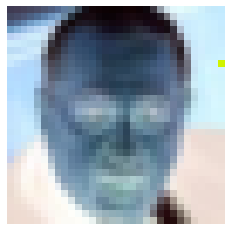

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
127.09345245
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
15.08430862
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
5.67898798
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.74984419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 3

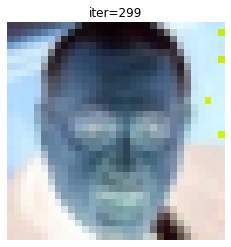

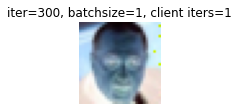

########### Showing the results for the current B-C_Iters comnbo#######
[1, 1, 0.999880313873291, tensor(1.0208e-05, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


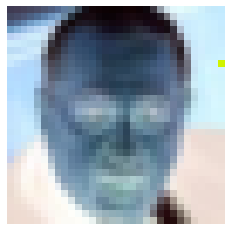

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
127.09345245
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
15.08430862
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
5.67898798
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.74984419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 3

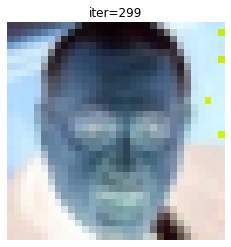

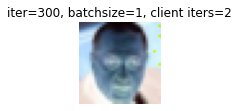

########### Showing the results for the current B-C_Iters comnbo#######
[1, 2, 0.999880313873291, tensor(1.0208e-05, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


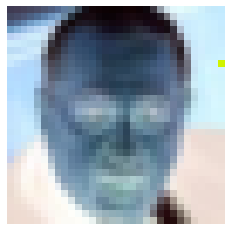

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
127.09345245
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
15.08430862
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
5.67898798
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.74984419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 3

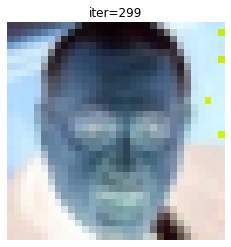

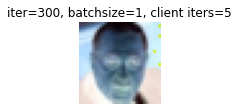

########### Showing the results for the current B-C_Iters comnbo#######
[1, 5, 0.999880313873291, tensor(1.0208e-05, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


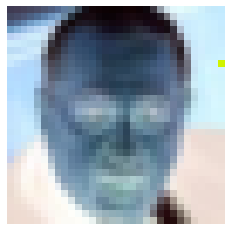

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
127.09345245
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
15.08430862
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
5.67898798
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.74984419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 3

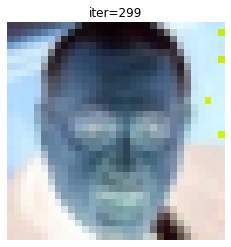

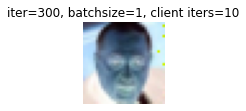

########### Showing the results for the current B-C_Iters comnbo#######
[1, 10, 0.999880313873291, tensor(1.0208e-05, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


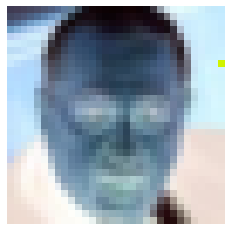

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
127.09345245
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
15.08430862
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
5.67898798
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.74984419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 3

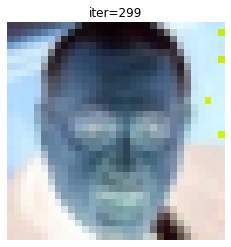

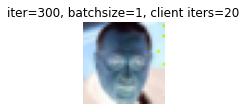

########### Showing the results for the current B-C_Iters comnbo#######
[1, 20, 0.999880313873291, tensor(1.0208e-05, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10]
torch.Size([1, 3, 32, 32])
torch.Size([1, 1])
torch.Size([1, 106])
tensor([[0]])


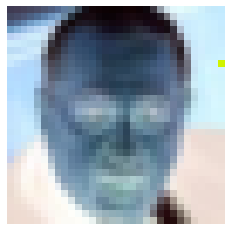

torch.Size([1, 3, 32, 32])
torch.Size([1, 106])
Dummy label is 90.
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
127.09345245
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
15.08430862
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
5.67898798
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
1.74984419
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([1, 3, 3

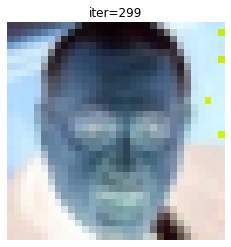

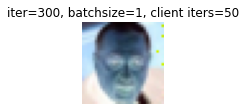

########### Showing the results for the current B-C_Iters comnbo#######
[1, 50, 0.999880313873291, tensor(1.0208e-05, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


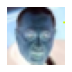

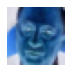

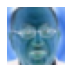

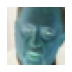

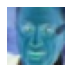

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
14.87366104
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
1.31222045
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.52620560
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.28755286
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32,

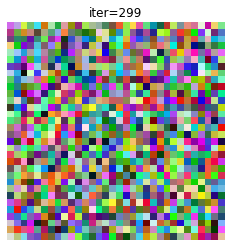

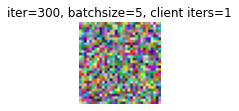

########### Showing the results for the current B-C_Iters comnbo#######
[5, 1, 0.0027050648350268602, tensor(7.1272, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


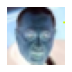

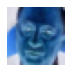

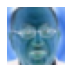

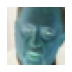

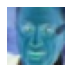

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
14.87366104
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
1.31222045
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.52620560
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.28755286
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32,

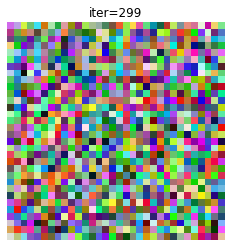

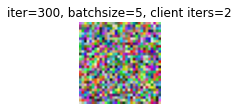

########### Showing the results for the current B-C_Iters comnbo#######
[5, 2, 0.0027050648350268602, tensor(7.1272, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


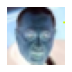

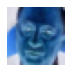

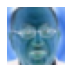

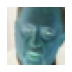

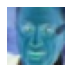

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
14.87366104
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
1.31222045
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.52620560
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.28755286
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32,

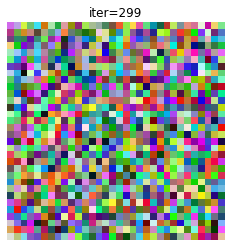

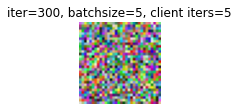

########### Showing the results for the current B-C_Iters comnbo#######
[5, 5, 0.0027050648350268602, tensor(7.1272, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


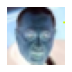

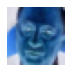

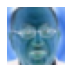

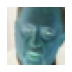

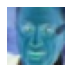

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
14.87366104
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
1.31222045
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.52620560
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.28755286
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32,

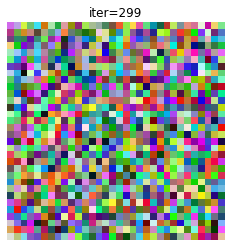

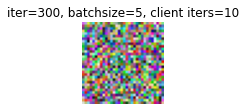

########### Showing the results for the current B-C_Iters comnbo#######
[5, 10, 0.0027050648350268602, tensor(7.1272, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


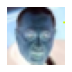

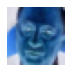

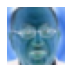

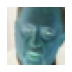

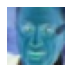

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
14.87366104
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
1.31222045
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.52620560
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.28755286
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32,

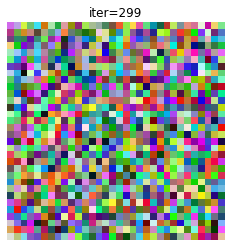

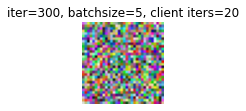

########### Showing the results for the current B-C_Iters comnbo#######
[5, 20, 0.0027050648350268602, tensor(7.1272, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53]
torch.Size([5, 3, 32, 32])
torch.Size([5, 1])
torch.Size([5, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0]])


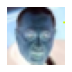

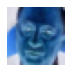

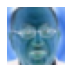

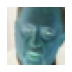

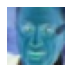

torch.Size([5, 3, 32, 32])
torch.Size([5, 106])
Dummy label is 23.
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
14.87366104
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
1.31222045
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.52620560
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
0.28755286
torch.Size([5, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([5, 3, 32,

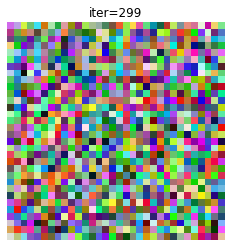

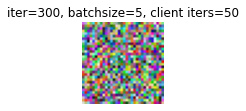

########### Showing the results for the current B-C_Iters comnbo#######
[5, 50, 0.0027050648350268602, tensor(7.1272, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


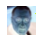

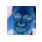

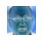

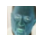

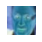

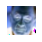

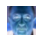

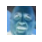

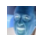

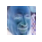

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
18.78791809
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.70104975
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.22704476
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.11522691
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

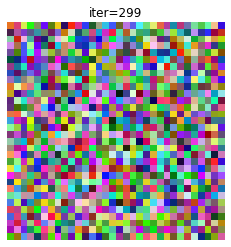

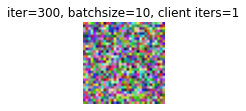

########### Showing the results for the current B-C_Iters comnbo#######
[10, 1, 0.0008610691875219345, tensor(7.6513, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


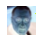

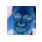

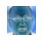

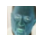

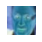

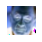

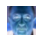

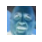

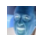

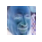

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
18.78791809
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.70104975
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.22704476
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.11522691
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

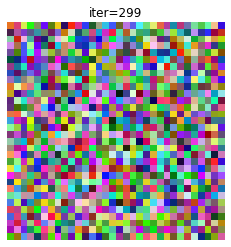

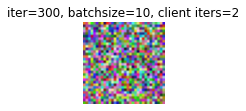

########### Showing the results for the current B-C_Iters comnbo#######
[10, 2, 0.0008610691875219345, tensor(7.6513, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


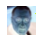

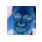

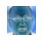

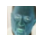

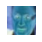

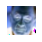

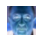

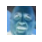

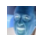

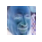

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
18.78791809
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.70104975
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.22704476
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.11522691
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

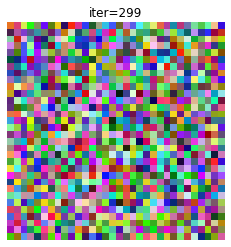

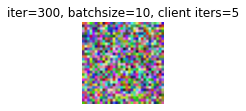

########### Showing the results for the current B-C_Iters comnbo#######
[10, 5, 0.0008610691875219345, tensor(7.6513, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


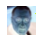

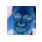

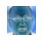

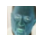

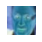

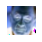

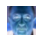

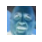

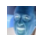

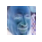

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
18.78791809
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.70104975
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.22704476
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.11522691
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

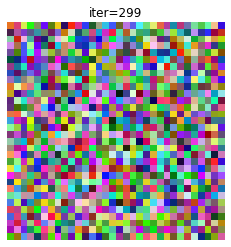

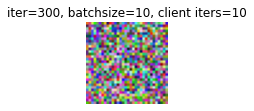

########### Showing the results for the current B-C_Iters comnbo#######
[10, 10, 0.0008610691875219345, tensor(7.6513, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


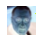

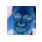

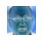

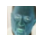

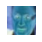

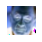

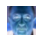

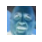

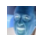

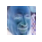

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
18.78791809
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.70104975
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.22704476
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.11522691
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

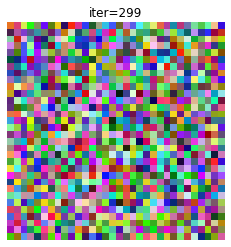

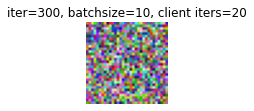

########### Showing the results for the current B-C_Iters comnbo#######
[10, 20, 0.0008610691875219345, tensor(7.6513, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128]
torch.Size([10, 3, 32, 32])
torch.Size([10, 1])
torch.Size([10, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


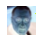

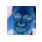

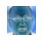

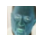

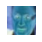

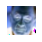

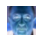

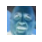

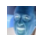

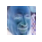

torch.Size([10, 3, 32, 32])
torch.Size([10, 106])
Dummy label is 71.
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
18.78791809
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.70104975
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.22704476
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
0.11522691
torch.Size([10, 3, 32, 32])
torch.Size([3, 32, 32])
to

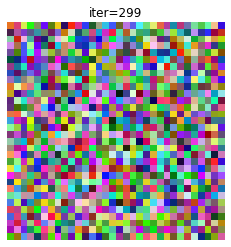

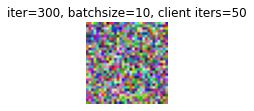

########### Showing the results for the current B-C_Iters comnbo#######
[10, 50, 0.0008610691875219345, tensor(7.6513, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
9.35748386
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.36445916
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.10410085
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.05247499
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

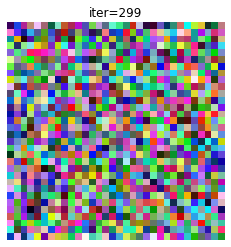

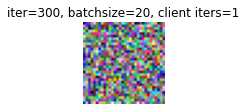

########### Showing the results for the current B-C_Iters comnbo#######
[20, 1, -0.0001157631995738484, tensor(8.0570, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
9.35748386
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.36445916
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.10410085
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.05247499
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

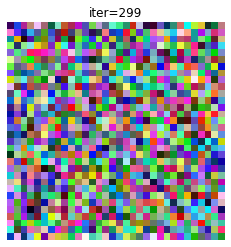

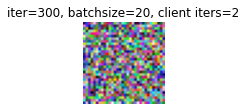

########### Showing the results for the current B-C_Iters comnbo#######
[20, 2, -0.0001157631995738484, tensor(8.0570, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
9.35748386
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.36445916
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.10410085
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.05247499
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

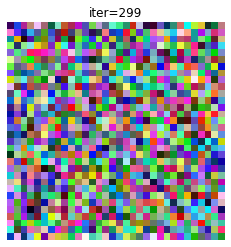

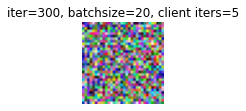

########### Showing the results for the current B-C_Iters comnbo#######
[20, 5, -0.0001157631995738484, tensor(8.0570, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
9.35748386
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.36445916
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.10410085
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.05247499
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

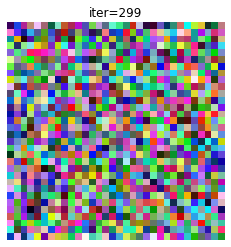

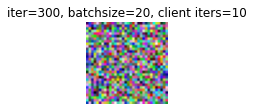

########### Showing the results for the current B-C_Iters comnbo#######
[20, 10, -0.0001157631995738484, tensor(8.0570, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
9.35748386
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.36445916
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.10410085
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.05247499
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

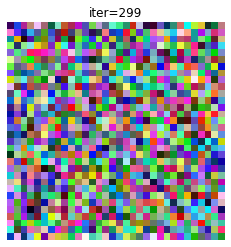

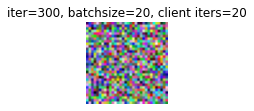

########### Showing the results for the current B-C_Iters comnbo#######
[20, 20, -0.0001157631995738484, tensor(8.0570, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480]
torch.Size([20, 3, 32, 32])
torch.Size([20, 1])
torch.Size([20, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([20, 3, 32, 32])
torch.Size([20, 106])
Dummy label is 89.
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
9.35748386
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.36445916
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.10410085
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
0.05247499
torch.Size([20, 3, 32, 32])
torch.Size([3, 32, 32])
tor

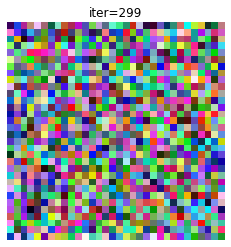

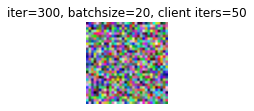

########### Showing the results for the current B-C_Iters comnbo#######
[20, 50, -0.0001157631995738484, tensor(8.0570, grad_fn=<MseLossBackward>)]
########### End of results for the current B-C_Iters comnbo#######
fininshed training
0.0
fininshed testing
tensor([0])
idx is below
[10, 14, 48, 49, 53, 54, 79, 92, 100, 128, 135, 169, 173, 232, 269, 282, 313, 351, 446, 480, 522, 526, 529, 556, 577, 578, 585, 593, 596, 599, 605, 608]
torch.Size([32, 3, 32, 32])
torch.Size([32, 1])
torch.Size([32, 106])
tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]])


torch.Size([32, 3, 32, 32])
torch.Size([32, 106])
Dummy label is 84.
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
18.97466278
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
8.58689213
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
5.56805992
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
3.60409713
torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])
to

In [ ]:
# Grand code to get all batch sizes and cleint iteration combos


import itertools
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
from torch.autograd import Variable
from torch.utils import data

from sklearn.datasets import fetch_lfw_people, fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10
from sklearn.datasets import fetch_openml as fetch_mldata

grandssimNmses = []
iter_ = 0
batch_size = [1,5,10,20,32]
maxiters = [1,2,5,10,20,50]

combos = [[1,5,10,20,32],[1,2,5,10,20,50]]
combos = list(itertools.product(*combos)) 




lfw_people=fetch_lfw_people(min_faces_per_person=55,color=True,slice_=(slice(61,189),slice(61,189)),resize=0.25)
x=lfw_people.images
y=lfw_people.target

target_names=lfw_people.target_names
n_classes=target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,shuffle=False)

        
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


x_train = torch.FloatTensor(X_train).to(device)
x_train = x_train.transpose(2,3).transpose(1,2)
y_train = [int(x) for x in y_train]
y_train = torch.LongTensor(y_train).to(device)

x_test = torch.FloatTensor(X_test).to(device)
x_test = x_test.transpose(2,3).transpose(1,2)
y_test = [int(x) for x in y_test]
y_test = torch.LongTensor(y_test).to(device)


training = data.TensorDataset(x_train,y_train)
testing = data.TensorDataset(x_test,y_test)

dst_tensor=training
plt.imshow(tt(dst_tensor[0][0].cpu()))
criterion_train = nn.CrossEntropyLoss()
optimizer_train = optim.Adam(net.parameters(),lr=0.01)#,momentum=0.9)
trainloader = torch.utils.data.DataLoader(training,batch_size=64, shuffle=True)




for currbatchsize, curriterlim in combos:
  results = [currbatchsize, curriterlim]
  iter_ = 0
  for epoch in range(0):

      for i,data in enumerate(trainloader,0):
    
          #if epoch>=1:
          if iter_>= curriterlim:
              break
          iter_=iter_+1
          #print (iter_)
          inputs,label = data
          
          inputs,label =  Variable(inputs),Variable(label) 
        
          optimizer_train.zero_grad()
          
      
          outputs_benign=net(inputs)
          #outputs_benign = F.softmax(outputs_benign, dim=-1)
          #print (outputs_benign[0])
      
          loss_benign =  criterion_train(outputs_benign,label)
        
          #print("loss computed")
          loss_benign.backward()
          #print("loss BP")
          optimizer_train.step()
          print("client training loss")
          #if i%2000==0:
          print (loss_benign.item())
          #torch.save(net.state_dict(),'./LFW_net.pth')  
        
    
  print ('fininshed training')
  total = len(y_test)
  acc =0.0
  for ct in range(total):
      testing_data = tt(testing[ct][0].cpu())
      testing_data1 = tp(testing_data).to(device)
      testing_data2 = testing_data1.view(1, *testing_data1.size())
      y_pred = net(testing_data2)
      predicted = torch.argmax(y_pred)
    
      if predicted == y_test[ct]:
          acc=acc+1
  accuracy = acc / total
  print (accuracy)
  print ('fininshed testing')





  ######### honest participant #########
  img_index = 2   #use img_index
  dst_pil = tt(dst_tensor[img_index][0].cpu())   #use img_index

  gt_data = tp(dst_pil).to(device)
  gt_data = torch.unsqueeze(gt_data,0)

  gt_label = dst_tensor[img_index][1].long().to(device) #use img_index
  gt_label = gt_label.view(1, )
  gt_onehot_label = label_to_onehot(gt_label, num_classes=106)

  # for i in range(0,100):
  #   plt.imshow(tt(dst_tensor[i][0].cpu()))
  #   plt.show()
  # plt.show()
  # plt.axis('off')
  # plt.savefig("./lfw_batch_idx_12")

  print(gt_label)

  batch = currbatchsize
  #idx_m = [20,25,32,33,48,79,84]
  #idx_m = [2]
  idx_m = []
  match = 1
  for s in range(1000):
      if dst_tensor[s][1]==gt_label:
          if match==1:
              match = match + 1
          else:    
              idx_m.append(s)
          
          # dst_pil = tt(dst_tensor[s][0].cpu())
          # plt.imshow(dst_pil)
          # plt.axis('off')
          #plt.savefig("./original/lfw_batch_idx_%s"%(len(idx_m)))
          
          
          if len(idx_m)==batch:
              break
  print("idx is below")
  print (idx_m)
              
  for bat in range(batch-1):
              dst_pil = tt(dst_tensor[idx_m[bat+1]][0].cpu())   #use img_index
              tmp = torch.unsqueeze(tp(dst_pil).to(device),0)
              #print(tmp.shape)
              gt_data = torch.cat((gt_data,tmp),0)

              gt_label_tmp = dst_tensor[idx_m[bat+1]][1].long().to(device) #use img_index
              gt_label_tmp = gt_label_tmp.view(1, )
              gt_label = torch.cat((gt_label,gt_label_tmp),0)
              gt_onehot_label = torch.cat((gt_onehot_label,label_to_onehot(gt_label_tmp, num_classes=106)),0)

  gt_label = torch.reshape(gt_label,(-1,1))    
  print (gt_data.shape)
  print (gt_label.shape)
  print (gt_onehot_label.shape)
  print (gt_label)
  for i in range(batch):
    plt.subplot(1,batch,i+1)
    plt.imshow(tt(gt_data[i].cpu()))
    plt.axis("off")
    plt.show()

  plt.imshow(dst_pil)
  plt.axis('off')
  #plt.savefig("./attack_image/original")

  plt.title("Ground truth image")
  # print("GT label is %d." % gt_label.item(), "\nOnehot label is %d." % torch.argmax(gt_onehot_label, dim=-1).item())

  # compute original gradient 
  out = net(gt_data)
  y = criterion(out, gt_onehot_label)
  dy_dx = torch.autograd.grad(y, net.parameters())


  # share the gradients with other clients
  original_dy_dx = list((_.detach().clone() for _ in dy_dx))






  # generate dummy data and label
  torch.manual_seed(1890)

  usePatterned = False
  print(gt_data.size())
  aaa = torch.rand([3,8,8])
  bbb = torch.cat((aaa,aaa),dim=1)
  ccc = torch.cat((bbb,bbb),dim=1)
  ddd = torch.cat((ccc,ccc),dim=2)
  eee = torch.cat((ddd,ddd),dim=2)
  dummy_data5 = torch.unsqueeze(eee,dim=0).to(device).requires_grad_(True)

  dummy_data = torch.randn(gt_data.size()).to(device).requires_grad_(True)
  dummy_label = torch.randn(gt_onehot_label.size()).to(device).requires_grad_(True)

  print(dummy_label.size())

  if usePatterned:
    dummy_data = dummy_data5

  #aaa = torch.rand([3,16,16])
  #bbb = torch.cat((aaa,aaa),dim=1)
  #ccc = torch.cat((bbb,bbb),dim=2)
  #dummy_data = torch.unsqueeze(ccc,dim=0).to(device).requires_grad_(True)


  plt.imshow(tt(dummy_data[0].cpu()))
  plt.title("Dummy data")
  print("Dummy label is %d." % torch.argmax(dummy_label[0], dim=-1).item())






  ###### LAST CELL #####

  from pytorch_msssim import ssim
  import torch.nn.functional as F
  optimizer = torch.optim.LBFGS([dummy_data, dummy_label] )

  history = []
  history_batch = []
  history.append(tt(dummy_data[0].cpu()))
  mses = []
  percept_dis = np.zeros(300)
  recover_dis = np.zeros(300)
  for iters in range(300):
      
      plt.imshow(tt(dummy_data[0].cpu()))
      plt.title("iter=%d" % (iters))
      plt.axis('off')
      
      print(dummy_data.size())
      print(gt_data[0].size())
      percept_dis[iters]=ssim(dummy_data[0][None,:].cpu(),gt_data[0][None,:],data_range=0).item()
      recover_dis[iters]=torch.dist(dummy_data.cpu(),gt_data,2).item()
      
          
      #print("Dummy label is %d." % torch.argmax(dummy_label, dim=-1).item())
      #plt.savefig("./attack_image/gif_iters_%s_label_%s"%(iters,torch.argmax(dummy_label, dim=-1).item()))
      #plt.clf()
      
      
      def closure():
          optimizer.zero_grad()

          pred = net(dummy_data) 
          dummy_onehot_label = F.softmax(dummy_label, dim=-1)
          
          #print (pred.shape)
          #print (dummy_onehot_label)
          dummy_loss = criterion(pred, dummy_onehot_label) # TODO: fix the gt_label to dummy_label in both code and slides.
          dummy_dy_dx = torch.autograd.grad(dummy_loss, net.parameters(), create_graph=True)
          dummy_dy_dp = torch.autograd.grad(dummy_loss, dummy_data, create_graph=True)
          #print (dummy_dy_dp[0].shape)
          
          grad_diff = 0
          grad_count = 0
          count =0
          for gx, gy in zip(dummy_dy_dx, original_dy_dx): # TODO: fix the variablas here
              grad_diff += ((gx - gy) ** 2).sum()
              
              
              grad_count += gx.nelement()
              
              #if count == 9:
              #    break
              count=count+1
          # grad_diff = grad_diff / grad_count * 1000
          grad_diff.backward()
          #print (count)
          
          #print (dummy_dy_dx)
          #print (original_dy_dx)
          
          
          return grad_diff
      

        
      optimizer.step(closure)
      if iters % 5 == 0: 
          current_loss = closure()
          print ("%.8f" % current_loss.item())
          #print(iters, "%.8f" % current_loss.item())
      history.append(tt(dummy_data[0].cpu()))
      
      mses.append(F.mse_loss(gt_data[0, :], dummy_data[0, :]))
    
  plt.figure(figsize=(12, 1.5))
  # iter_idx = [0,20,40,60,80,100,120,140,160,180] 
  iter_idx = [0,5,10,20,50,80,100,300] 
  # for i in range(8):
  #   plt.subplot(1, 8, i + 1)
  #   plt.imshow(history[iter_idx[i]])
  #   plt.title("iter=%d, batchsize=%d, client iters=%d" %(300,currbatchsize,curriterlim))
  #   plt.axis('off')
  # plt.savefig("./attack_image/random.png")
  plt.imshow(history[299])
  plt.title("iter=%d, batchsize=%d, client iters=%d" %(300,currbatchsize,curriterlim))
  plt.axis('off')
  plt.show() 
  results.append(percept_dis[299])
  results.append(mses[299])    

  print("########### Showing the results for the current B-C_Iters comnbo#######")
  print(results)
  print("########### End of results for the current B-C_Iters comnbo#######")

  
  grandssimNmses.append(results)
  #np.savetxt('ssim_dlg.out',percept_dis,fmt="%4f")
  #np.savetxt('mse_ours.out',recover_dis,fmt="%4f")

      
  #     for bat in range(batch-1):
  #         history_batch.append(tt(dummy_data[bat].cpu()))
      
